# Inheritance hierarchy of builtins that are types

In [1]:
import builtins
import urllib

from graphviz import Digraph, Graph
from IPython.core.display import HTML
from typeguard import typechecked

In [2]:
@typechecked
def make_hyperlink(url: str, inner_html: str) -> HTML:
    """Make a hyperlink that opens a page in a new browser tab when clicked."""
    tag_attributes = f'href="{url}" target="_blank" style="font-size: 1.3rem"'
    return HTML(f'<a {tag_attributes}>{inner_html}</a>')

In [3]:
@typechecked
def make_graphvizonline_link(graph: Graph | Digraph) -> HTML:
    """Make a Jupyter/IPython link to open a graph in GraphvizOnline."""
    quoted = urllib.parse.quote(str(graph))
    url = f'https://dreampuf.github.io/GraphvizOnline/#{quoted}'
    return make_hyperlink(url, 'Open in GraphvizOnline')

In [4]:
@typechecked
def get_public_builtin_types() -> list[type]:
    """Get builtins module members that are types that are meant to be used."""
    names = (name for name in dir(builtins) if not name.startswith('_'))
    members = (getattr(builtins, name) for name in names)
    return [member for member in members if isinstance(member, type)]

In [5]:
@typechecked
def build_graph() -> Digraph:
    """Build an inheritance-hierarchy graph of builtins that are types."""
    types = get_public_builtin_types()
    visited = set(types)
    graph = Digraph()

    while types:
        child = types.pop()
        for parent in child.__bases__:
            graph.edge(parent.__name__, child.__name__)
            if parent not in visited:
                visited.add(parent)
                types.append(parent)
    
    return graph

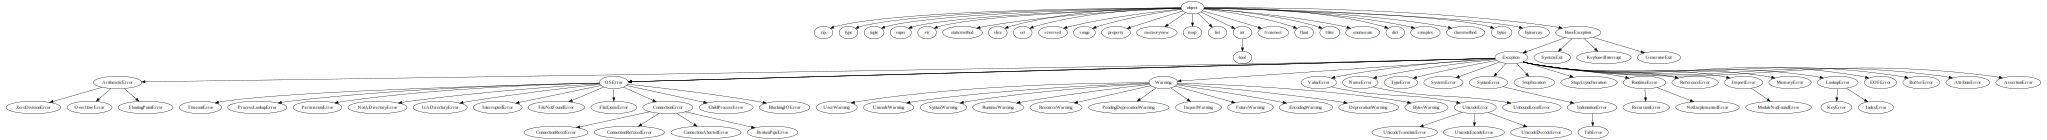

In [6]:
graph = build_graph()
display(graph)
make_graphvizonline_link(graph)